In [88]:
#importing all necessary packages. 
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
plt.rcParams['figure.figsize'] = (12.0,8.0)
plt.rcParams['figure.constrained_layout.use']= True
plt.rc('font',size=10)

In [89]:
#plot_the_import_dataset_Wee2.csv and rename the column values.
df = pd.read_csv('Week3.csv',header = None,skiprows =1)
df.columns=['X1','X2','Y']
#check data are imported correctly or not
print(df.head())
df.shape
#Assign each column Values:
X1=df.iloc[:,0]
X2=df.iloc[:,1]
X=np.column_stack((X1,X2))
y=df.iloc[:,2]


     X1    X2         Y
0  0.50  0.93  1.152940
1 -0.66 -0.08  0.463906
2  0.85 -0.92 -0.083444
3 -0.47 -0.87 -0.382683
4 -0.24  0.69  1.397459


In [90]:
#adding features to the dataset using polynomial function.
from sklearn.preprocessing import PolynomialFeatures
Xpoly = PolynomialFeatures(5).fit_transform(X)
print(Xpoly.shape)
print(y.shape)

(199, 21)
(199,)


In [91]:
#for c=1 and k-fold =5.
mean_error=[]; std_error=[]
C= 1
lasso = Lasso(alpha=1/(2*C))
kf = KFold(n_splits=5)
temp=[]
print("Mean Squared Error for k fold 5")
for train, test in kf.split(Xpoly):
    lasso.fit(Xpoly[train], y[train])
    ypred = lasso.predict(Xpoly[test])
    temp.append(mean_squared_error(y[test],ypred))
    print(mean_squared_error(y[test],ypred))
mean_error.append(np.array(temp).mean())
std_error.append(np.array(temp).std())
print("Mean")
print(mean_error)
print("Standard_deviation")
print(std_error)
print("Variance")
print(np.square(std_error))

Mean Squared Error for k fold 5
0.5114539858884222
0.4219016348246762
0.481120957070134
0.35224481268178326
0.5557317844673728
Mean
[0.4644906349864777]
Standard_deviation
[0.07102115017201473]
Variance
[0.005044]


Mean
[0.4674993849249891, 0.4644906349864777, 0.46306862847850266, 0.4615692530131281, 0.4600562274814686, 0.45678188297877087]
Standard_deviation
[0.029480259326136127, 0.07102115017201473, 0.11408893872542503, 0.15905263405445516, 0.2562046996126029, 0.36212601775509534]
Variance
[0.00086909 0.005044   0.01301629 0.02529774 0.06564085 0.13113525]


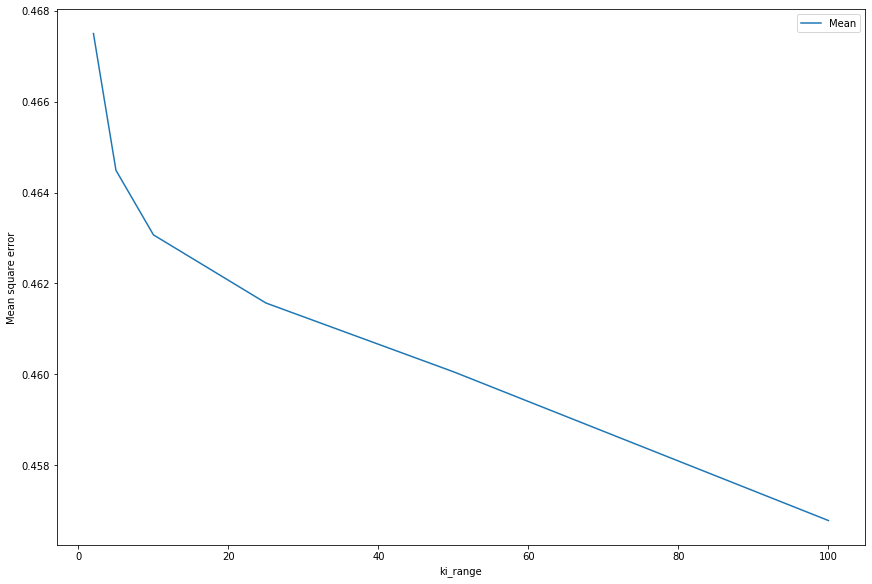

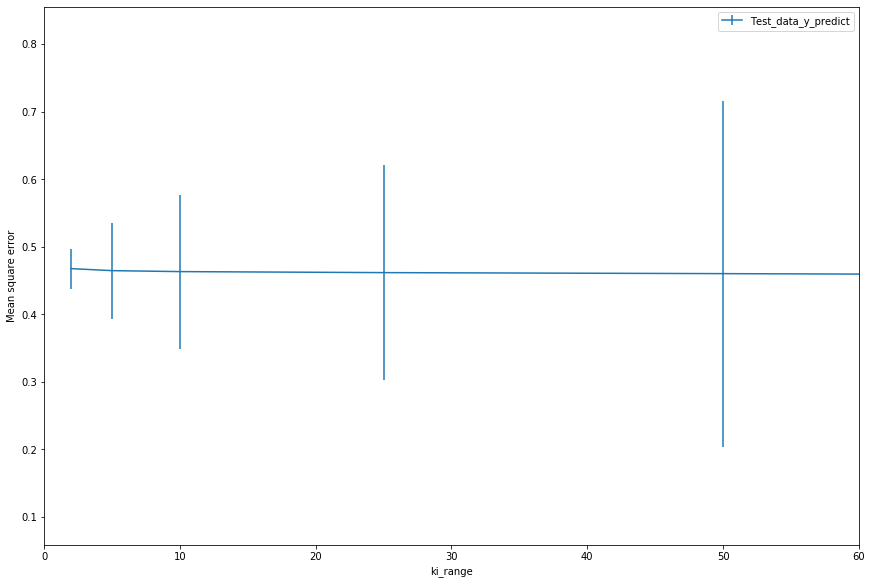

In [92]:
mean_error_1=[]; std_error_1=[]; var1=[]
ki_range = [2,5, 10, 25, 50, 100 ]
C=1
for i in ki_range:
    model = Lasso(alpha=1/(2*C))
    temp_1=[]
    kf = KFold(n_splits=i)
    for train, test in kf.split(Xpoly):
        model.fit(Xpoly[train], y[train])
        ypred_1 = model.predict(Xpoly[test])
        temp_1.append(mean_squared_error(y[test],ypred_1))
    mean_error_1.append(np.array(temp_1).mean())
    std_error_1.append(np.array(temp_1).std())
    var1.append(np.square(std_error))
print("Mean")
print(mean_error_1)
print("Standard_deviation")
print(std_error_1)
print("Variance")
print(np.square(std_error_1))
plt.plot(ki_range,mean_error_1)
plt.xlabel('ki_range')
plt.ylabel('Mean square error')
plt.legend(["Mean"])
plt.show()
plt.errorbar(ki_range,mean_error_1,yerr=std_error_1)
plt.xlabel('ki_range')
plt.ylabel('Mean square error')
plt.legend(["Test_data_y_predict"])
plt.xlim((0,60))
plt.show()

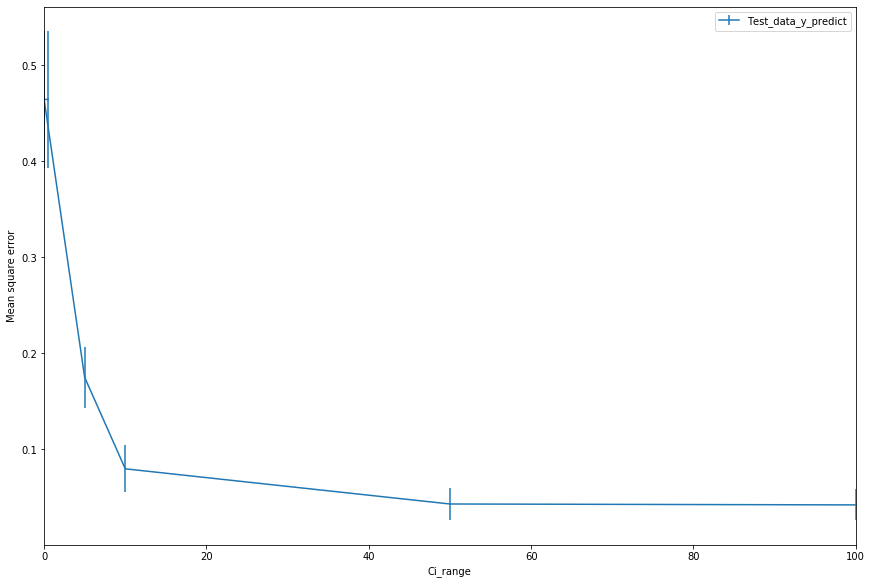

[-0.05447359 -0.02000246 -0.08518045 -0.029358   -0.05405797]
Accuracy: -0.05 (+/− 0.02)


In [99]:
mean_error_2=[]; std_error_2=[]
Ci_range = [0.5, 0.01, 0.005, 5, 10, 50, 100]
for Ci in Ci_range:
    model1 = Lasso(alpha=1/(2*Ci))
    temp_2=[]
    kf = KFold(n_splits=5)
    for train, test in kf.split(Xpoly):
        model1.fit(Xpoly[train], y[train])
        ypred_2 = model1.predict(Xpoly[test])
        temp_2.append(mean_squared_error(y[test],ypred_2))
    mean_error_2.append(np.array(temp_2).mean())
    std_error_2.append(np.array(temp_2).std())
plt.errorbar(Ci_range,mean_error_2,yerr=std_error_2)
plt.xlabel('Ci_range')
plt.ylabel('Mean square error')
plt.legend(["Test_data_y_predict"])
plt.xlim((0,100))
plt.show()
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model1, Xpoly[test], y[test], cv=5, scoring='neg_mean_squared_error')
print(scores)
print("Accuracy: %0.2f (+/− %0.2f)" % (scores.mean(), scores.std()))

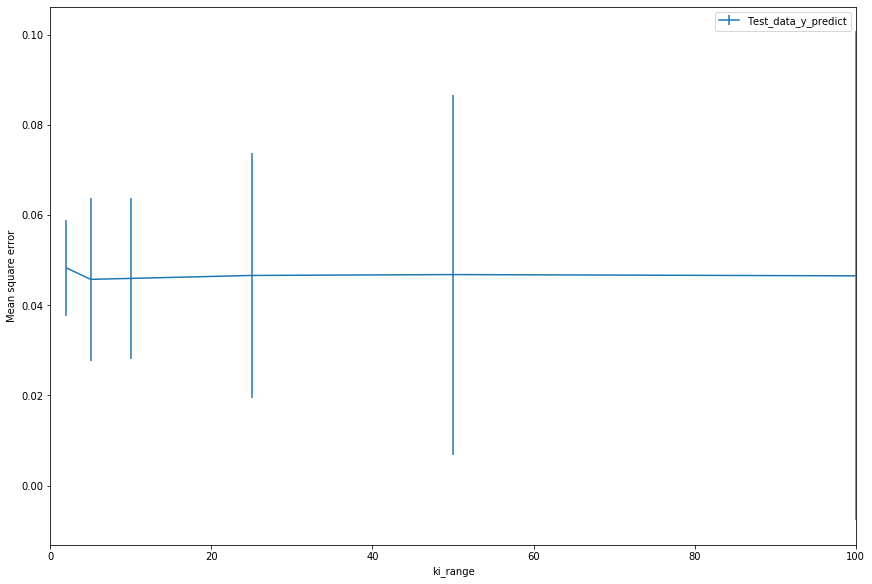

In [94]:
mean_error_r=[]; std_error_r=[]
ki_range_r = [2,5, 10, 25, 50, 100 ]
C_r=1
for i in ki_range_r:
    model_r = Ridge(alpha=1/(2*C_r))
    temp_r=[]
    kf_r = KFold(n_splits=i)
    for train, test in kf_r.split(Xpoly):
        model_r.fit(Xpoly[train], y[train])
        ypred_r = model_r.predict(Xpoly[test])
        temp_r.append(mean_squared_error(y[test],ypred_r))
    mean_error_r.append(np.array(temp_r).mean())
    std_error_r.append(np.array(temp_r).std())
plt.errorbar(ki_range_r,mean_error_r,yerr=std_error_r)
plt.xlabel('ki_range')
plt.ylabel('Mean square error')
plt.legend(["Test_data_y_predict"])
plt.xlim((0,100))
plt.show()


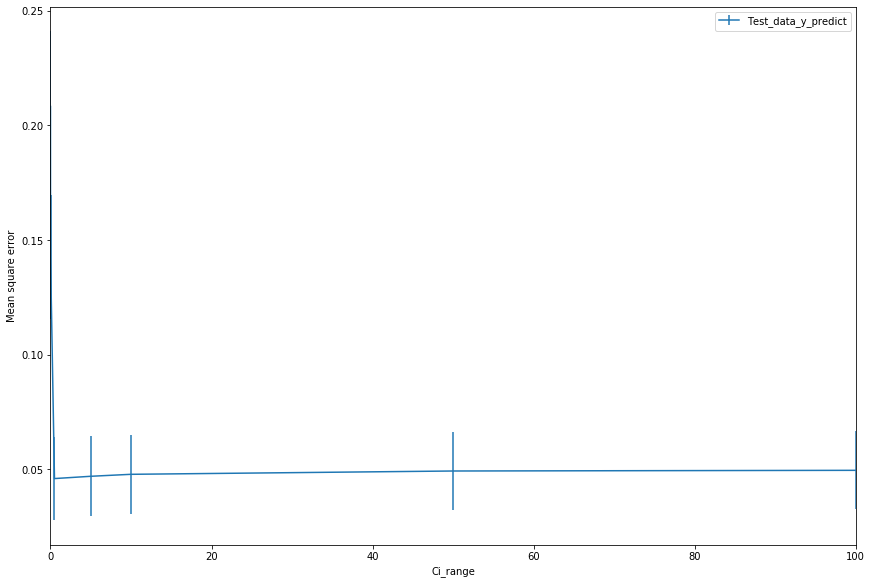

[-0.12535699 -0.05072354 -0.15456372 -0.14760146 -0.3187477 ]
Accuracy: -0.16 (+/− 0.09)


In [98]:
mean_error_r1=[]; std_error_r1=[]
Ci_range_r1 = [0.005, 0.01, 0.5, 5, 10, 50, 100]
for Ci in Ci_range_r1:
    model_r1 = Ridge(alpha=1/(2*Ci))
    temp_r1=[]
    kf = KFold(n_splits=5)
    for train, test in kf.split(Xpoly):
        model_r1.fit(Xpoly[train], y[train])
        ypred_r1 = model_r1.predict(Xpoly[test])
        temp_r1.append(mean_squared_error(y[test],ypred_r1))
    mean_error_r1.append(np.array(temp_r1).mean())
    std_error_r1.append(np.array(temp_r1).std())
plt.errorbar(Ci_range_r1,mean_error_r1,yerr=std_error_r1)
plt.xlabel('Ci_range')
plt.ylabel('Mean square error')
plt.legend(["Test_data_y_predict"])
plt.xlim((0,100))
plt.show()
from sklearn.model_selection import cross_val_score
scores_r = cross_val_score(model_r1, Xpoly[test], y[test], cv=5, scoring='neg_mean_squared_error')
print(scores_r)
print("Accuracy: %0.2f (+/− %0.2f)" % (scores_r.mean(), scores_r.std()))